In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [2]:
device = torch.device("cuda")

In [3]:
mnist_train = torchvision.datasets.FashionMNIST(root='~/test/Datasets/FashionMNIST',train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='~/test/Datasets/FashionMNIST',train=False, download=True, transform=transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /home/hatcher/test/Datasets/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /home/hatcher/test/Datasets/FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /home/hatcher/test/Datasets/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /home/hatcher/test/Datasets/FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /home/hatcher/test/Datasets/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /home/hatcher/test/Datasets/FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /home/hatcher/test/Datasets/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /home/hatcher/test/Datasets/FashionMNIST/FashionMNIST/raw

Processing...
Done!


/home/hatcher/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,shuffle=True, num_workers=2)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,shuffle=False, num_workers=2)

In [5]:
class SoftmaxNet(nn.Module):
    def __init__(self):
        super(SoftmaxNet,self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(784,10)
    def forward(self,x):
        y = self.flatten(x)
        y = self.linear(y)
        return y

In [6]:
net = SoftmaxNet()
net.to(device)

SoftmaxNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [7]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)

SoftmaxNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [8]:
loss = nn.CrossEntropyLoss()

In [9]:
optimizer = optim.SGD(net.parameters(),lr=0.03)

In [10]:
loss_list = []
epoch_list = []
num_epochs = 40
for epoch in range(1,num_epochs+1):
    for X,y in train_iter:
        X = X.to(device)
        y = y.to(device)
        l=loss(net(X),y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    epoch_list.append(epoch)
    loss_list.append(l.item())
    print('epoch %d, loss: %f' % (epoch, l.item()))      

epoch 1, loss: 0.867235
epoch 2, loss: 0.560748
epoch 3, loss: 0.566779
epoch 4, loss: 0.516512
epoch 5, loss: 0.543296
epoch 6, loss: 0.593223
epoch 7, loss: 0.397618
epoch 8, loss: 0.570597
epoch 9, loss: 0.579598
epoch 10, loss: 0.479862
epoch 11, loss: 0.584007
epoch 12, loss: 0.423430
epoch 13, loss: 0.480897
epoch 14, loss: 0.457495
epoch 15, loss: 0.520656
epoch 16, loss: 0.661036
epoch 17, loss: 0.512971
epoch 18, loss: 0.503785
epoch 19, loss: 0.483479
epoch 20, loss: 0.353771
epoch 21, loss: 0.499994
epoch 22, loss: 0.625395
epoch 23, loss: 0.559819
epoch 24, loss: 0.300076
epoch 25, loss: 0.449118
epoch 26, loss: 0.319708
epoch 27, loss: 0.536897
epoch 28, loss: 0.374219
epoch 29, loss: 0.514993
epoch 30, loss: 0.425964
epoch 31, loss: 0.392318
epoch 32, loss: 0.507820
epoch 33, loss: 0.482491
epoch 34, loss: 0.466943
epoch 35, loss: 0.414772
epoch 36, loss: 0.463498
epoch 37, loss: 0.386525
epoch 38, loss: 0.320455
epoch 39, loss: 0.493260
epoch 40, loss: 0.351812


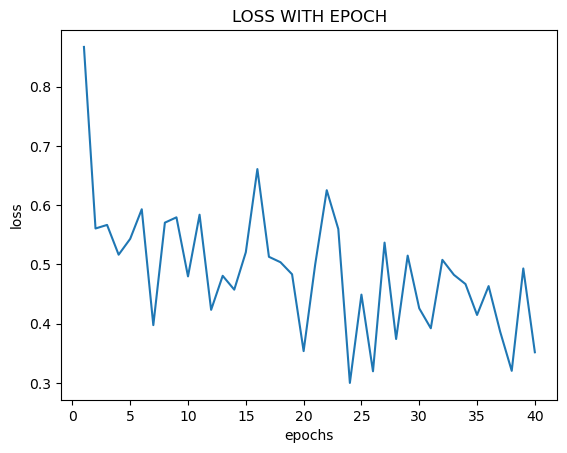

In [11]:
import matplotlib.pyplot as plt
plt.plot(epoch_list,loss_list)
plt.title("LOSS WITH EPOCH")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [12]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        X = X.to(device)
        y = y.to(device)
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

In [13]:
#训练集精度
evaluate_accuracy(train_iter,net)

0.86085

In [14]:
#测试集精度
evaluate_accuracy(test_iter,net)

0.8413